In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.covariance import EllipticEnvelope
from datetime import date
import category_encoders as ce

## Note: for ranking purposes label 'sold_flag' has been taken as the prediction target. If any ad is predicted with sold flag==1,the commision earned on that ad can be calculated from 'commisiontable.csv' .<br> Ranking can be done based on the calculated commision for those ads for which 'sold_flag' has been predicted as 1

In [2]:
hist=pd.read_csv('historical_data.csv')

In [3]:
hist.isna().sum()/hist.shape[0]
length=hist.shape[0]
(hist.width_of_picture[hist.width_of_picture=='   ?'].count()+hist.isna().sum().width_of_picture)/length

0.27465861122374857

In [4]:
## these columns dropped as %of missing values in them was more than 75%

hist2=hist.drop(['color_slug','body_type','Unnamed: 0','stk_year'],axis=1)

In [5]:
#cleaning of features and creating new features


hist_dropna=hist2.dropna()
hist_dropna=hist_dropna[hist_dropna.door_count!='None']
hist_dropna=hist_dropna[hist_dropna.seat_count!='None']
hist_dropna=hist_dropna[hist_dropna.height_of_picture!='   ?']
hist_dropna=hist_dropna[hist_dropna.width_of_picture!='   ?']
hist_dropna.door_count=hist_dropna.door_count.astype(int)
hist_dropna['height_of_picture']=pd.to_numeric(hist_dropna['height_of_picture'])
hist_dropna['width_of_picture']=pd.to_numeric(hist_dropna['width_of_picture'])
hist_dropna['aspect_ratio']=pd.to_numeric(hist_dropna['aspect_ratio'])
hist_dropna['no_of_pictures']=pd.to_numeric(hist_dropna['no_of_pictures'])
hist_dropna['manuf_time']=date.today().year-hist_dropna.manufacture_year
hist_dropna['seat_count']=pd.to_numeric(hist_dropna['seat_count'])

In [6]:
# extracting features from date time features

hist_dropna.date_created=pd.to_datetime(hist_dropna.date_created)
hist_dropna.date_last_seen=pd.to_datetime(hist_dropna.date_last_seen,errors='coerce')
hist_dropna=hist_dropna.dropna()
hist_dropna['created_year']=[x.year for x in hist_dropna['date_created'] ]
hist_dropna['seen_year']=[x.year for x in hist_dropna['date_last_seen']]
hist_dropna['created_month']=[x.month for x in hist_dropna['date_created'] ]
hist_dropna['seen_month']=[x.month for x in hist_dropna['date_last_seen'] ]
hist_dropna['created_week']=[x.week for x in hist_dropna['date_created'] ]
hist_dropna['seen_week']=[x.week for x in hist_dropna['date_last_seen'] ]
hist_dropna['seen_day']=[ x.day for x in hist_dropna['date_last_seen']]

In [7]:
#label encoding categorical features

b=ce.BinaryEncoder(cols=['maker'])
e=b.fit_transform(hist_dropna['maker'])

b2=ce.BinaryEncoder(cols=['model'])
e2=b2.fit_transform(hist_dropna['model'])

b3=ce.BinaryEncoder(cols=['fuel_type'])
e3=b3.fit_transform(hist_dropna['fuel_type'])

b4=ce.BinaryEncoder(cols=['transmission'])
e4=b4.fit_transform(hist_dropna['transmission'])

hist_dropna=pd.concat([hist_dropna,e,e2,e3,e4],axis=1)


In [8]:
#number of listed ads and sold ads per year

hist_dropna.groupby(['created_year','sold_flag'])[['sold_flag']].count().unstack()


sold_flag      
sold_flag            0     1
created_year                
2015             27766  6888
2016             15968  3930
2017              6854  1702

In [9]:
#percentage of ads posted per year which got coverted to deals
#similar accross all years so no new information


hist_dropna.groupby(['created_year','sold_flag'])[['sold_flag']].count().unstack().apply(lambda x:x[1]/x[0],axis=1)

created_year
2015    0.248073
2016    0.246117
2017    0.248322
dtype: float64

In [10]:
#percentage of ads seen each year which got converted into ads : similar

hist_dropna.groupby(['seen_year','sold_flag'])[['sold_flag']].count().unstack().apply(lambda x:x[1]/x[0],axis=1)

seen_year
2011    0.253270
2012    0.243666
2015    0.238480
2016    0.248821
2017    0.249874
dtype: float64

In [11]:
#percentage of converted ads per month :similar stats

hist_dropna.groupby(['created_month','sold_flag'])[['sold_flag']].count().unstack().apply(lambda x:x[1]/x[0],axis=1)

created_month
1     0.244840
2     0.252110
3     0.245132
11    0.240783
12    0.250977
dtype: float64

In [12]:
#prcentage of seen ads converted per month: similar stats


hist_dropna.groupby(['seen_month','sold_flag'])[['sold_flag']].count().unstack().apply(lambda x:x[1]/x[0],axis=1)

seen_month
1     0.245076
2     0.254493
3     0.253069
7     0.248872
11    0.280105
12    0.238213
dtype: float64

In [13]:
#prcentage of created ads converted per week: similar stats

hist_dropna.groupby(['created_week','sold_flag'])[['sold_flag']].count().unstack().apply(lambda x:x[1]/x[0],axis=1)

created_week
1     0.247259
2     0.252820
3     0.233088
4     0.232168
5     0.225434
6     0.259669
7     0.253543
8     0.235925
9     0.265903
10    0.248611
11    0.243852
45    0.268882
46    0.229113
47    0.228806
48    0.245096
49    0.248851
50    0.252402
51    0.263512
52    0.249322
53    0.229939
dtype: float64

In [14]:
#prcentage of seen ads converted per week: similar stats

hist_dropna.groupby(['seen_week','sold_flag'])[['sold_flag']].count().unstack().apply(lambda x:x[1]/x[0],axis=1)

seen_week
1     0.248373
2     0.266481
3     0.248829
4     0.237328
5     0.240000
6     0.253453
7     0.266737
8     0.253818
9     0.248835
10    0.255584
11    0.245668
26    0.249066
27    0.244898
45    0.400000
46    0.202128
47    0.329609
48    0.276423
49    0.257463
50    0.227070
51    0.244165
52    0.224051
53    0.236147
dtype: float64

In [15]:
#percentage of converted ads based on mileage.

p=pd.qcut(hist_dropna['mileage'],12)
hist_dropna.groupby([p,'sold_flag'])[['sold_flag']].count().unstack().apply(lambda x:x[1]/x[0],axis=1)

mileage
(-0.001, 500.0]          0.255254
(500.0, 13000.0]         0.255355
(13000.0, 25822.75]      0.248215
(25822.75, 46500.0]      0.242388
(46500.0, 69753.0]       0.245801
(69753.0, 90906.0]       0.242776
(90906.0, 112000.0]      0.261136
(112000.0, 134000.0]     0.249403
(134000.0, 155000.0]     0.245535
(155000.0, 179800.0]     0.239156
(179800.0, 215202.5]     0.242553
(215202.5, 3500000.0]    0.242381
dtype: float64

In [16]:
# creating a random forest model and initializing features to be used during training


hist_dropna=hist_dropna[hist_dropna.sold_flag!='compact']


y=hist_dropna.sold_flag
x=hist_dropna[['mileage','engine_power','price_eur','engine_displacement','door_count','height_of_picture','width_of_picture','aspect_ratio','no_of_pictures'
     ,'manuf_time','created_year','seen_year','seat_count']]

D:\anaconda\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [17]:
#normalising data and splitting into training /testing


x=x.apply(lambda x:(x-x.mean())/x.std())
x=pd.concat([x,e,e2,e3,e4],axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [18]:
#filtering out outliers

ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(x_train)
mask = yhat != -1
x_train, y_train = x_train[mask], y_train[mask]

D:\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:644: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


In [19]:
# creating and fitting random forest model


model = RandomForestClassifier()
model.fit(x_train,y_train)

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
#finding feature importances


importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.11260
Feature: 1, Score: 0.06741
Feature: 2, Score: 0.09680
Feature: 3, Score: 0.06388
Feature: 4, Score: 0.02220
Feature: 5, Score: 0.08714
Feature: 6, Score: 0.09020
Feature: 7, Score: 0.08901
Feature: 8, Score: 0.05006
Feature: 9, Score: 0.06572
Feature: 10, Score: 0.02198
Feature: 11, Score: 0.03011
Feature: 12, Score: 0.01565
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00155
Feature: 15, Score: 0.00917
Feature: 16, Score: 0.01133
Feature: 17, Score: 0.01015
Feature: 18, Score: 0.01041
Feature: 19, Score: 0.01081
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00147
Feature: 22, Score: 0.00628
Feature: 23, Score: 0.00894
Feature: 24, Score: 0.01205
Feature: 25, Score: 0.01236
Feature: 26, Score: 0.01234
Feature: 27, Score: 0.01248
Feature: 28, Score: 0.01292
Feature: 29, Score: 0.01192
Feature: 30, Score: 0.01120
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00043
Feature: 33, Score: 0.00758
Feature: 34, Score: 0.00775
Feature: 35, Score: 0.00798
Fe

In [21]:
#finding precision recall and f score for training data


y_pred_train=model.predict(x_train)
metric=precision_recall_fscore_support(y_train, y_pred_train)

conf_mat_train=pd.DataFrame(metric,index=['precision','recall','f1_score','size'],columns=[1,0])

In [22]:
conf_mat_train

1            0
precision      0.967356     0.999165
recall         0.999821     0.863746
f1_score       0.983321     0.926533
size       33551.000000  8308.000000

In [248]:
model.fit(x_test,y_test)
y_pred_test=model.predict(x_test)
metric=precision_recall_fscore_support(y_test, y_pred_test)

conf_mat_test=pd.DataFrame(metric,index=['precision','recall','f1_score','size'],columns=[1,0])


# --------------------------------ANSWERS TO GIVEN QUESTIONS----------------------------

In [32]:
p=pd.to_datetime(hist['date_last_seen'],errors='coerce')
hist['seen_month']=[x.month for x in p]

In [33]:
hist['seen_month'].unique()

array([ 2., 12.,  7.,  1., 10.,  3., 11.,  8.,  9., nan])

# Answer 1 starts from here:

In [34]:
#defining assumed weather dictionary to map seasons to month
#'w'-winter 's'-summer 'r'-rainy

weather_dict={2.:'w',12.:'w',7.:'s',1.:'w',3.:'s',11.:'w',8.:'r',9.:'r'}

In [35]:
#mapping seasons to month

hist.seen_month=hist.seen_month.map(weather_dict)

#cleaning body_type feature

hist['body_type']=hist['body_type'].str.strip()
hist['body_type'].unique()

array(['coupe', nan, 'other', 'convertible', 'compact', 'stationwagon',
       'van', 'offroad', 'sedan', 'transporter'], dtype=object)

In [37]:
#eliminatiog redundant data in body type

hist.body_type.replace(['com_pact','COMPACT','nan'],['compact','compact',np.nan],inplace=True)
h=hist[['body_type','seen_month']][~(hist.body_type.isna()) & hist.sold_flag==1]
h.body_type.unique()

array(['coupe', 'other', 'compact', 'stationwagon', 'sedan', 'offroad',
       'van', 'transporter', 'convertible'], dtype=object)

In [40]:
#Answer

hstat=h.groupby(['body_type','seen_month'])['body_type'].count().unstack().idxmax()
hstat

seen_month
r    other
s    other
w    other
dtype: object

## in all seasons body_type 'other' is in most demand


## ----------------------A1 ends here------------------------------

In [41]:
#function for data preprocessing on unseen data


def make_features2(df):
    
    df=df.dropna()
    df.door_count[df.door_count=='None']=0
    df.seat_count[df.seat_count=='None']=0
    df.transmission[df.transmission=='None']=0
    df=df[df.height_of_picture!='   ?']
    df=df[df.width_of_picture!='   ?']
    
    
    df.door_count=df.door_count.astype(int)
    df['height_of_picture']=pd.to_numeric(df['height_of_picture'])
    df['width_of_picture']=pd.to_numeric(df['width_of_picture'])
    df['aspect_ratio']=pd.to_numeric(df['aspect_ratio'])
    df['no_of_pictures']=pd.to_numeric(df['no_of_pictures'])
    df['manuf_time']=date.today().year-df.manufacture_year
    df['seat_count']=pd.to_numeric(df['seat_count'])
    
    df.date_created=pd.to_datetime(df.date_created,errors='coerce')
    df.date_last_seen=pd.to_datetime(df.date_last_seen,errors='coerce')
    df['created_year']=[x.year for x in df['date_created'] ]
    df['seen_year']=[x.year for x in df['date_last_seen']]
    
  
    
    
    e=b.fit_transform(df['maker'])
    e2=b2.fit_transform(df['model'])
    e3=b3.fit_transform(df['fuel_type'])
    e4=b4.fit_transform(df['transmission'])
    
    df['model_10']=0
    df['fuel_type_3']=0
    y=df.sold_flag
    df.drop(['manufacture_year','date_created','date_last_seen','test1','test2','maker','model','fuel_type','transmission','sold_flag'],
            axis=1,inplace=True)
    df=df.apply(lambda x:(x-x.mean())/x.std())
    
    df['model_10']=0
    df['fuel_type_3']=0
    
    df=pd.concat([df,e,e2,e3,e4],axis=1)
    
    
    return df,y
    
    

# A2 starts here:

In [42]:
#extracting data from inventory.csv file

inventory=pd.read_csv('inventory_data.csv')
inventory.drop(['color_slug','body_type','Unnamed: 0','stk_year'],axis=1,inplace=True)


In [43]:
# creating and preprocessing features for inventory data

m,y=make_features2(inventory)

m=m[y==0]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\anaconda\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is t

In [44]:
y_pred=model.predict(m)

In [45]:
#indices of overpriced posts. Criteria: those ads for which 'sold_flag' has been predicted as '0' ,meaning those deals could not be made 
#which infers that the listed price was much more than the worth of the car features


overpriced_indices=np.where(y_pred==0)

# A3 start here:

In [47]:
p=pd.to_datetime(hist.date_created)
hist2=hist.set_index(p)

In [48]:
#resampling data by month

hist2=hist2.resample('m')['Unnamed: 0'].count()


In [49]:
# taking data from April 2016 since before that pattern was different , april 2016 was the month a disruptive event occured

hist3=hist2['2016-04-30':]


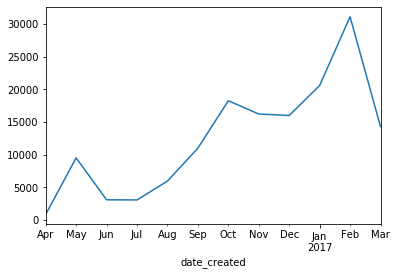

In [51]:
from matplotlib import pyplot

hist3.plot()
pyplot.show()

In [53]:
hist3len=hist3.shape[0]

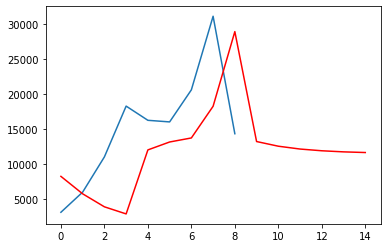

In [54]:
# creating a timeseries arima model for the data


from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

months_exp=6
#size = int(len(hist3) * 0.66)
#train, test = hist3[0:size], hist3[size:len(hist3)]
#history = [x for x in train]
history=list(hist3)
history=history[0:3]
predictions = list()

# walk-forward validation
length=(hist3len-3)
for t in range(length+months_exp):
    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
   
    
    if t>=length:
           obs=yhat
    else:
        obs=hist3[t+3] 
    history.append(obs)
   
pyplot.plot(hist3[3:].values)
pyplot.plot(predictions, color='red')
pyplot.show()


In [55]:
#answer for next 6 months 

np.round(history[-(months_exp):])

array([[13184.],
       [12516.],
       [12109.],
       [11862.],
       [11705.],
       [11610.]])

# A4 start here:

In [57]:
# creating a model without the 'no_of_pictures' feature

x2=x_train.drop(['no_of_pictures'],axis=1)
model2=RandomForestClassifier()
model2.fit(x2,y_train)

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
y_pred2=model2.predict(x2)

In [84]:
precision_recall_fscore_support(y_train, y_pred2) #metrics after removing "no_of_pictures"

(array([0.9662852 , 0.99896801]),
 array([0.99978036, 0.85905607]),
 array([0.98274745, 0.92374425]),
 array([50081, 12395], dtype=int64))

In [85]:
precision_recall_fscore_support(y_train, y_pred) #metrics before removing "no_of_pictures"

(array([0.96768957, 0.99953393]),
 array([0.99990016, 0.8651069 ]),
 array([0.98353121, 0.92747481]),
 array([50081, 12395], dtype=int64))

- not much change after removing "no_of_pictures"

# A5 start here:-


1. no. of missing values (NAN) of features per ad should not exceed a threshold t1
2. the "aspect_ratio" feature should be above a certain threshhold

# A6 start here:-

- Criteria of choosing top3 features is the feature_importance attribute of the learned model

In [95]:
importance_series=pd.Series(importance,index=x.columns)
importance_series.sort_values(ascending=False)[:3]

mileage         0.116277
price_eur       0.095402
aspect_ratio    0.090721
dtype: float64

- top3 features are :mileage,price_eur,aspect_ratio

# A7 starts here:-

### build the neural network architecture
model = Sequential() <br>
model.add(Dense(15, input_dim=11, activation='relu')) <br>
model.add(Dense(1, activation='linear'))

# A8 starts here:-

1. Since the given dataset was an imbalanced one , model performance was measured in terms of f-score ,precision and recall.
2. since the above metrics are similar for training as well as testing datasets ,the model niether underfits nor overfits

# A9 starts here:-

1.  if ranking is done on basis of 'date last seen' this means that this model is based on related features like 'last_seen_year','last_seen_month','last_seen_week','last_seen_day'

2. since model is based on descending rank of 'last_seen_date' ,means that its absolute values are to be used and no need for label encoding

In [59]:
x3=hist_dropna[['seen_year','seen_month','seen_week','seen_day']]
y3=hist_dropna[['sold_flag']]

In [60]:
x3=(x3-x3.mean())/x3.std()

In [61]:
yhat = ee.fit_predict(x3)
mask = yhat != -1
x3, y3 = x3[mask], y3[mask]

D:\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-15.245338120257118 > -79.156586117391214). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
D:\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-15.245338120257118 > -79.156586117392209). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
D:\anaconda\lib\site-packages\sklearn\covariance\robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-15.251051547031047 > -79.158319578618034). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
D:\anaconda\lib\site-packages\sklearn\covarian

In [62]:
model3=RandomForestClassifier()
model3.fit(x3,y3)
y3_pred=model3.predict(x3)
precision_recall_fscore_support(y3_pred,y3) 

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(array([0.99980082, 0.00176892]),
 array([0.80170899, 0.6875    ]),
 array([0.88986394, 0.00352875]),
 array([62610,    32], dtype=int64))

1. this model as compared to my model is severly baised with almost completely failing to predict classes with sold-value=0

# A10 starts here:

1. deleted columns with more than 75% missing values
2. cleaned remaining columns by removing nans,redundant ,unknown data
3. extracted time data from datetime features
4. label encoded categorical features
5. created some new features like 'manuf_time'
6. eliminated outliers
7. normalized data
8. used randomforest model which works well with imbalanced data 
 
As a result got .99 accuracy on data with sold_flag==1 and .96 on data with sold_flag==0